In [1]:
from analysis import *
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
from bookkeeper import *

We first load all the nodes and compute some basic statistics for each simulation step.

In [2]:
SIM_NAME = "selfish_mine_test"
SIM_REPS = 1
SIM_ITERS = 5000000

print(SIM_NAME)
for REP in range(SIM_REPS): 
    print(REP)
    location = f'../dumps/{SIM_NAME}_{REP}'
    nodes = []
    for filename in os.listdir(os.fsencode(location)):
        filename = filename.decode("utf-8")
        with open(f'{location}/{filename}', 'rb') as f:
            if filename ==  'bookkeeper':
                bookkeeper = pickle.load(f)
            else:
                nodes.append(pickle.load(f))

    an = Analysis(bookkeeper, nodes)
            
    print(f'Loaded {len(nodes)} nodes.')

    blocks = an.get_all_blocks()
    print(f'Total blocks:\t{len(blocks)}')

    stale_rates = [an.stale_block_rate(node) for node in nodes]
    print(f'Stale rate:\t{round(np.mean(stale_rates), 5)}')

    block_ints = [an.avg_block_interval(node) for node in nodes]
    print(f'Block interval:\t{np.mean(block_ints)} iters')

    delays_50 = [an.block_percentile_delay(block, 0.5) for id, block in blocks.items()]
    delays_90 = [an.block_percentile_delay(block, 0.9) for id, block in blocks.items()]
    print(f'50% delay:\t{round(np.mean(delays_50), 2)} iters')
    print(f'90% delay:\t{round(np.mean(delays_90), 2)} iters')

    tps = an.transactions_per_second(blocks.values(), SIM_ITERS / 10)
    print(f'Tx per second:\t{tps}')

selfish_mine_test
0
Loaded 2 nodes.
Total blocks:	818
Stale rate:	0.25306
Block interval:	8167.854575163398 iters
50% delay:	0.0 iters
90% delay:	4888.88 iters
Tx per second:	3.4324456695618997


For a run implementing the selfish mining attack, we can perform further calculations.

In [5]:
honest = [node for node in nodes if 'HONEST' in node.name][0]
selfish = [node for node in nodes if 'SELFISH' in node.name][0]

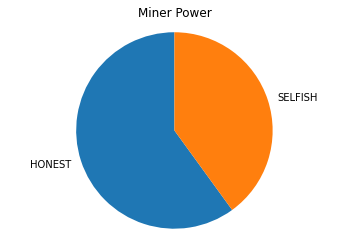

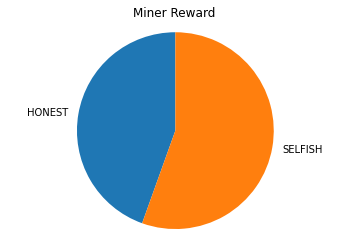

In [7]:
rewards = an.reward_distribution()

fig1, ax1 = plt.subplots()
ax1.pie([honest.mine_power, selfish.mine_power], labels=['HONEST', 'SELFISH'], startangle=90)
ax1.axis('equal')
plt.title('Miner Power')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(rewards.values(), labels=rewards.keys(), startangle=90)
ax1.axis('equal') 
plt.title('Miner Reward')
plt.show()